Task 1

In [2]:
import torch
import numpy as np

print("PyTorch Version:", torch.__version__)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt

PyTorch Version: 2.7.1+cu126


Tutorial Example

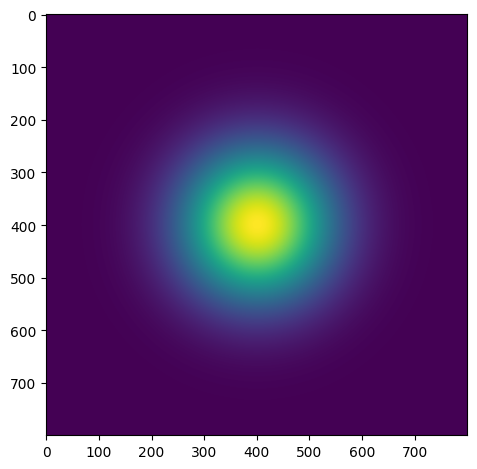

In [4]:
# Grid for computing image, subdivide the space
X, Y = np.mgrid[-4.0:4.0:0.01, -4.0:4.0:0.01]

# Load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

x = x.to(device)
y = y.to(device)

# Compute Gaussian
z = torch.exp(-(x**2 + y**2) / 2.0)

# Plot
plt.imshow(z.cpu().numpy())
plt.tight_layout()
plt.show()

Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib

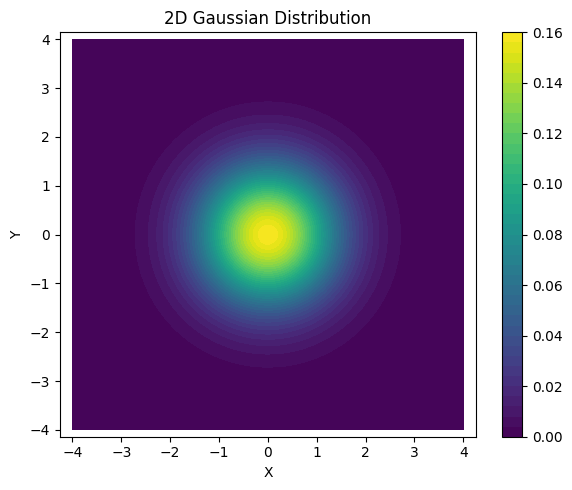

In [5]:
# Define parameters for the 2D Gaussian
mu_x, mu_y = 0.0, 0.0          # Mean
sigma_x, sigma_y = 1.0, 1.0    # Standard deviation

# Create a meshgrid over a 2D space
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Define the 2D Gaussian function
Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
    -(((X - mu_x) ** 2) / (2 * sigma_x ** 2) + ((Y - mu_y) ** 2) / (2 * sigma_y ** 2))
)

# Plot the surface
plt.figure(figsize=(6, 5))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.tight_layout()
plt.show()

Prompt: Now that you have a Gaussian function generated by AI, use similar code to create a 2D sine func-
tion (i.e. a sune function from PyTorch whose angle is dependent on x and y coordinates of the pixels)
and another plot of the resulting Tensor that shows the ‘stripes’ of this function

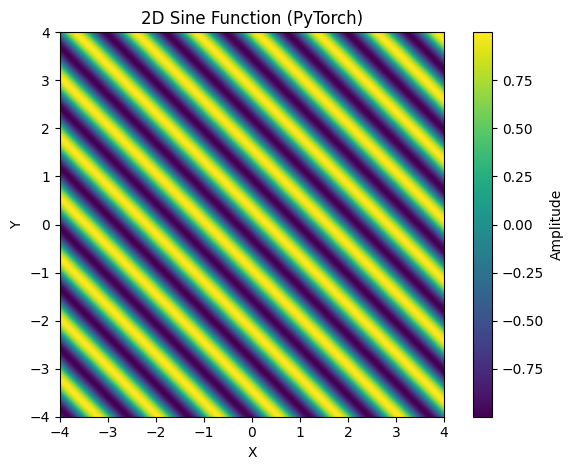

In [6]:
# Generate coordinate grid using torch
x = torch.linspace(-4, 4, 400)
y = torch.linspace(-4, 4, 400)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Sine function with combined spatial frequency
kx, ky = 5.0, 5.0
Z = torch.sin(kx * X + ky * Y)

# Plot using matplotlib (convert to numpy)
plt.imshow(Z.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('2D Sine Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor Filter

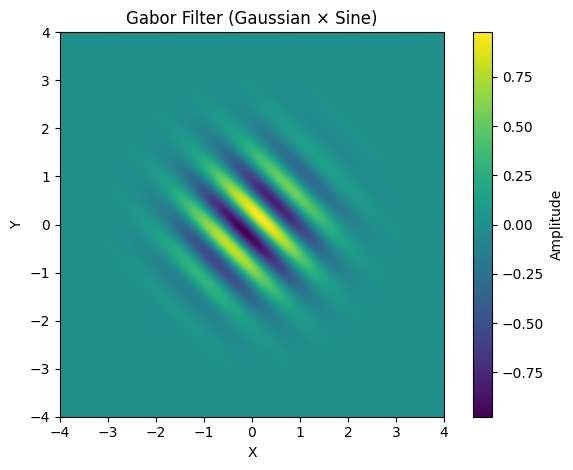

In [7]:
# Parameters for Gaussian
sigma = 1.0
gaussian = torch.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Parameters for sine function
kx, ky = 5.0, 5.0
sine_wave = torch.sin(kx * X + ky * Y)

# Element-wise multiplication (modulation)
gabor = gaussian * sine_wave

# Plot result
plt.imshow(gabor.numpy(), extent=[-4, 4, -4, 4], origin='lower', cmap='viridis')
plt.title('Gabor Filter (Gaussian × Sine)')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()

Gabor filter is like a stripe detector, only cares about particular angles, spacing and locations within the filtered section (the circle space in the middle). Application into feature extraction for detecting edges, textures and patterns in specific directions and scales

Task 2

/tmp/ipykernel_4249/213902109.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


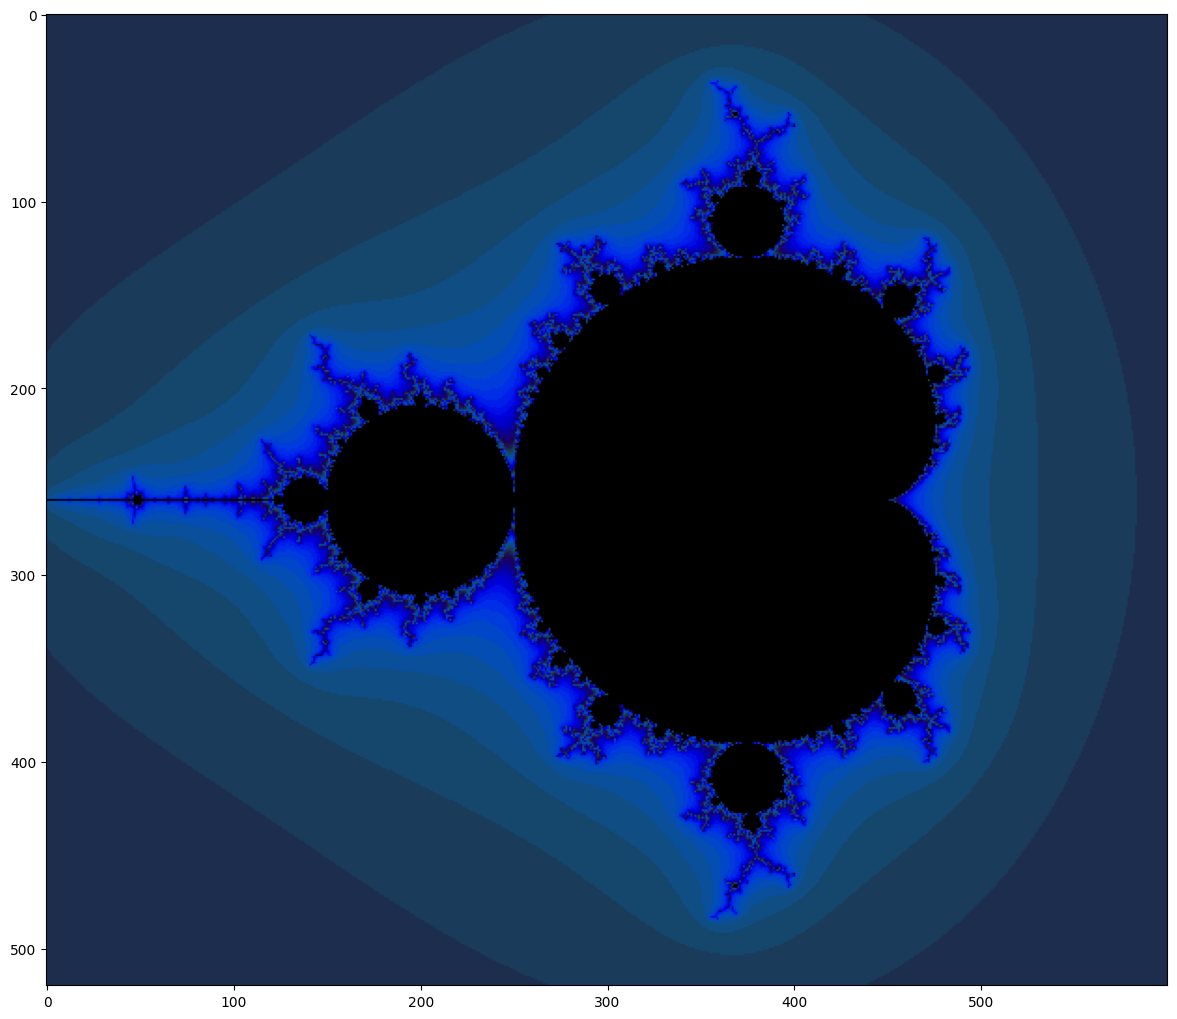

In [11]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005,-2:1:0.005]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs * zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """
    Display an array of iteration counts as a
    colorful picture of a fractal.
    """

    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

AI Mandelbrot set

Prompt: Generate the Mandelbrot set implemented in PyTorch and that runs on the GPU (i.e. seems to run fast and allows fast rendering)

Originally AI expected the code to be run on commandline, so it generated parameters like:
foo.py [-h] [--width WIDTH] [--height HEIGHT]
                            [--centre-x CENTRE_X] [--centre-y CENTRE_Y]
                            [--scale SCALE] [--max-iter MAX_ITER]
                            [--escape-radius ESCAPE_RADIUS] [--device DEVICE]
                            [--tile-size TILE_SIZE] [--gamma GAMMA]
                            [--outfile OUTFILE]

Prompt: I am running it in a jupyter notebook, can you adjust so i can just run it once

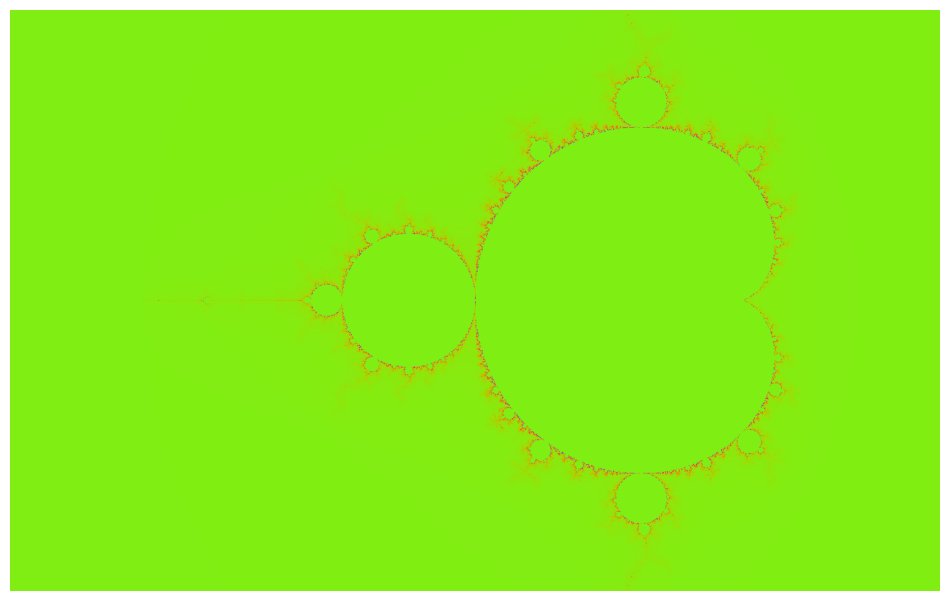

In [13]:
# Mandelbrot set with PyTorch on GPU (Jupyter-ready, single cell)
import torch
import matplotlib.pyplot as plt

# Auto-select device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

@torch.no_grad()
def mandelbrot(width=1024, height=768, centre=(-0.75, 0.0), scale=3.5, max_iter=500, escape_radius=4.0):
    pixel_size = scale / width
    x_min = centre[0] - scale / 2.0
    y_min = centre[1] - (pixel_size * height) / 2.0

    xs = torch.linspace(x_min, x_min + pixel_size * (width - 1), width, device=device)
    ys = torch.linspace(y_min, y_min + pixel_size * (height - 1), height, device=device)

    X, Y = torch.meshgrid(xs, ys, indexing='xy')
    C = torch.complex(X, Y)
    Z = torch.zeros_like(C)

    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    counts[mask] = max_iter
    return counts

def colourise(counts, max_iter=500):
    palette_size = 256
    t = (counts.float() / max_iter).clamp(0, 1)
    r = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.0))
    g = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.33))
    b = 0.5 + 0.5 * torch.sin(6.28318 * (t + 0.66))
    img = torch.stack([r, g, b], dim=-1)
    return (img * 255).byte().cpu().numpy()

# Parameters
width, height = 1600, 1000
centre_x, centre_y = -0.75, 0.0
scale = 3.5
max_iter = 1000

counts = mandelbrot(width, height, (centre_x, centre_y), scale, max_iter)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


Why is it green LOLL

Prompt: Why is my graph green can i make it a nicer colour

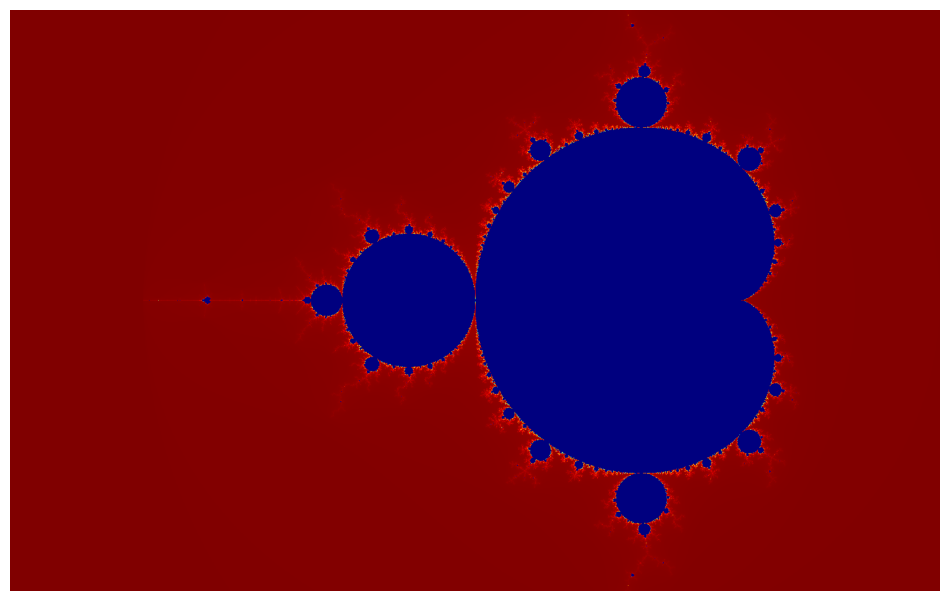

In [14]:
# Mandelbrot set with PyTorch on GPU (Jupyter-ready, single cell)
import torch
import matplotlib.pyplot as plt

# Auto-select device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

@torch.no_grad()
def mandelbrot(width=1024, height=768, centre=(-0.75, 0.0), scale=3.5, max_iter=500, escape_radius=4.0):
    pixel_size = scale / width
    x_min = centre[0] - scale / 2.0
    y_min = centre[1] - (pixel_size * height) / 2.0

    xs = torch.linspace(x_min, x_min + pixel_size * (width - 1), width, device=device)
    ys = torch.linspace(y_min, y_min + pixel_size * (height - 1), height, device=device)

    X, Y = torch.meshgrid(xs, ys, indexing='xy')
    C = torch.complex(X, Y)
    Z = torch.zeros_like(C)

    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    counts[mask] = max_iter
    return counts

def colourise(counts, max_iter=500):
    palette_size = 256
    t = (counts.float() / max_iter).clamp(0, 1)
    # Modified palette for more visually pleasing colours (inspired by "turbo")
    r = torch.clamp(1.5 - torch.abs(4 * t - 1.0), 0, 1)
    g = torch.clamp(1.5 - torch.abs(4 * t - 2.0), 0, 1)
    b = torch.clamp(1.5 - torch.abs(4 * t - 3.0), 0, 1)
    img = torch.stack([r, g, b], dim=-1)
    return (img * 255).byte().cpu().numpy()

# Parameters
width, height = 1600, 1000
centre_x, centre_y = -0.75, 0.0
scale = 3.5
max_iter = 1000

counts = mandelbrot(width, height, (centre_x, centre_y), scale, max_iter)
img = colourise(counts, max_iter)

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

2.3 Demo

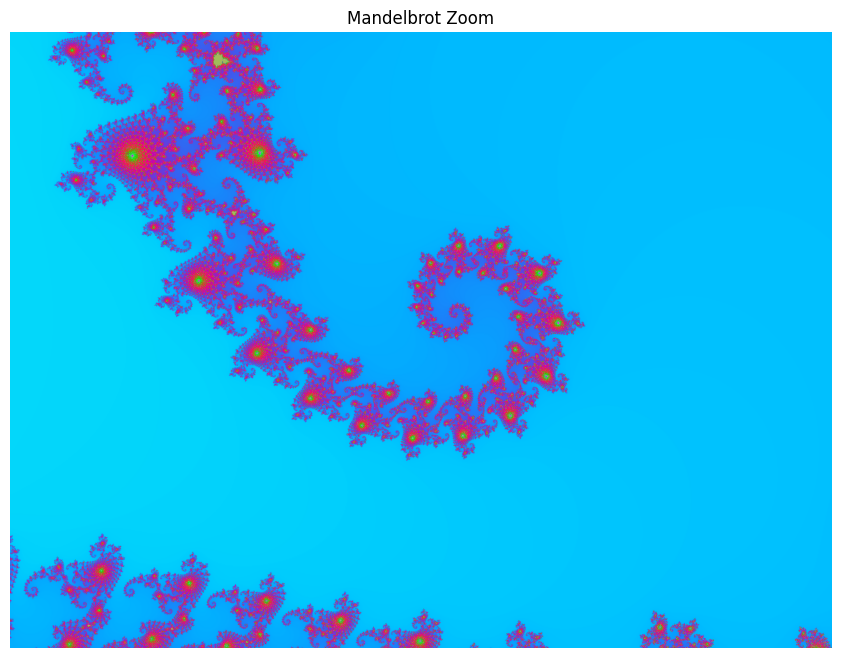

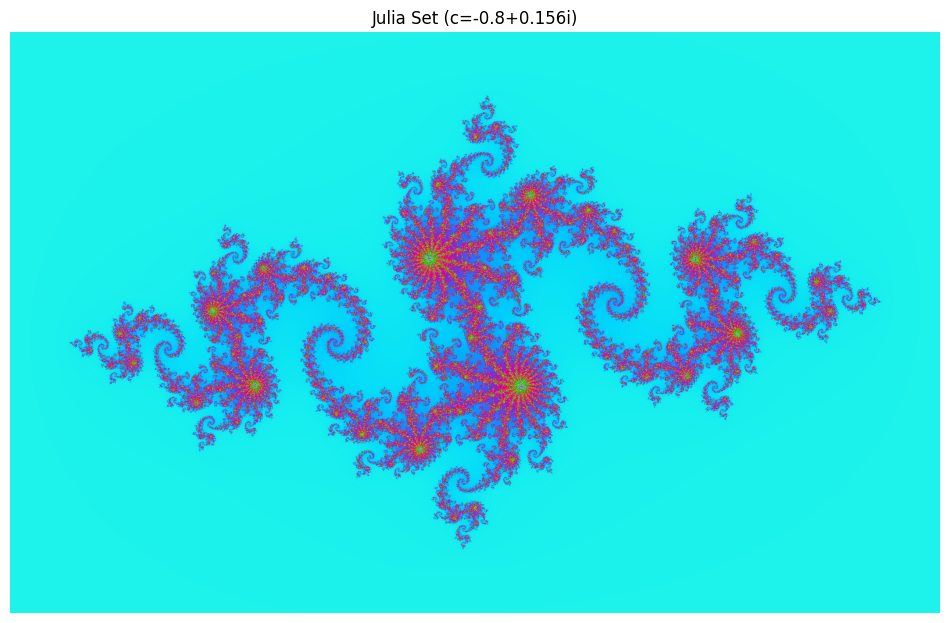

In [17]:
# Mandelbrot & Julia set with PyTorch on GPU (Jupyter-ready, single cell)
import torch
import matplotlib.pyplot as plt

# Auto-select device
if torch.cuda.is_available():
    device = torch.device("cuda")
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

@torch.no_grad()
def fractal(width=1024, height=768, centre=(-0.75, 0.0), scale=3.5, max_iter=500, escape_radius=4.0, mode='mandelbrot', c_param=(-0.8, 0.156)):
    pixel_size = scale / width
    x_min = centre[0] - scale / 2.0
    y_min = centre[1] - (pixel_size * height) / 2.0

    xs = torch.linspace(x_min, x_min + pixel_size * (width - 1), width, device=device)
    ys = torch.linspace(y_min, y_min + pixel_size * (height - 1), height, device=device)

    X, Y = torch.meshgrid(xs, ys, indexing='xy')

    if mode == 'mandelbrot':
        C = torch.complex(X, Y)
        Z = torch.zeros_like(C)
    elif mode == 'julia':
        C = torch.complex(torch.full_like(X, c_param[0]), torch.full_like(Y, c_param[1]))
        Z = torch.complex(X, Y)
    else:
        raise ValueError("mode must be 'mandelbrot' or 'julia'")

    counts = torch.zeros(C.shape, dtype=torch.int32, device=device)
    mask = torch.ones(C.shape, dtype=torch.bool, device=device)

    for i in range(1, max_iter + 1):
        Z[mask] = Z[mask] * Z[mask] + C[mask]
        mask_new = (Z.real * Z.real + Z.imag * Z.imag) <= escape_radius
        counts[mask & ~mask_new] = i
        mask = mask_new
        if not mask.any():
            break
    counts[mask] = max_iter
    return counts

def colourise(counts, max_iter=500):
    t = (counts.float() / max_iter).clamp(0, 1)
    # Default-style rainbow colour map
    r = torch.sin(0.016 * counts + 4) * 0.5 + 0.5
    g = torch.sin(0.013 * counts + 2) * 0.5 + 0.5
    b = torch.sin(0.01 * counts + 1) * 0.5 + 0.5
    img = torch.stack([r, g, b], dim=-1)
    return (img * 255).byte().cpu().numpy()

# High-resolution zoom example (Mandelbrot)
width, height = 2000, 1500
centre_x, centre_y = -0.7435, 0.1314  # Zoomed-in area
scale = 0.005
max_iter = 1500
counts = fractal(width, height, (centre_x, centre_y), scale, max_iter, mode='mandelbrot')
img = colourise(counts, max_iter)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Mandelbrot Zoom")
plt.show()

# Julia set example
width, height = 1600, 1000
centre_x, centre_y = 0.0, 0.0
scale = 3.5
max_iter = 1000
c_param = (-0.8, 0.156)
counts_julia = fractal(width, height, (centre_x, centre_y), scale, max_iter, mode='julia', c_param=c_param)
img_julia = colourise(counts_julia, max_iter)
plt.figure(figsize=(12, 8))
plt.imshow(img_julia)
plt.axis('off')
plt.title(f"Julia Set (c={c_param[0]}+{c_param[1]}i)")
plt.show()

Part 3

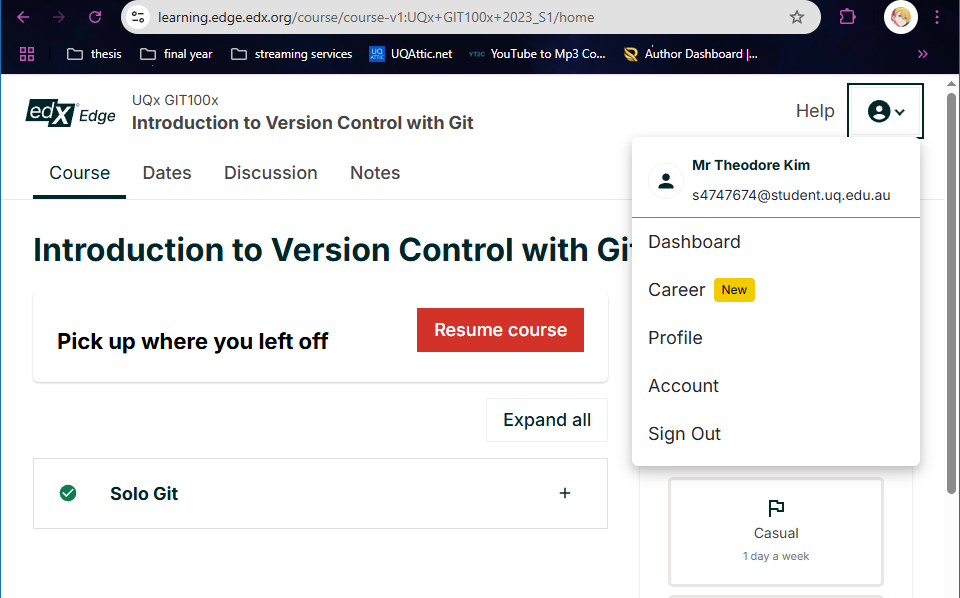